# About:

This notebook was created by Greg Hogg, for the Python for Data Science Final Project at MLNOW.ai.

The purpose of this project is to discover which factors are the most important in determining the price of an Air BnB in NYC.

We perform an extensive Exploratory Data Analysis of Air Bnb rentals using the public dataset avaiable at Kaggle [here](https://www.kaggle.com/datasets/)

## Preparation

In [5]:
import gdown

url = 'https://drive.google.com/uc?id=1XKyMYwuDJkWYWo2VfwsTmZvxnqYdezfw'
output = 'airbnb_data.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1XKyMYwuDJkWYWo2VfwsTmZvxnqYdezfw
To: /content/airbnb_data.csv
100%|██████████| 6.64M/6.64M [00:00<00:00, 37.9MB/s]


'airbnb_data.csv'

In [11]:
import pandas as pd

df = pd.read_csv('airbnb_data.csv')

df.head(2)

<ipython-input-11-2418033ba75d>:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_data.csv')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.3,3,314,1,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.3,2,365,0,NaN


## Data Cleaning

In [12]:
df = df.drop(['id', 'host_id', 'name', 'host_name', 'neighbourhood',
              'last_review', 'reviews_per_month',
              'calculated_host_listings_count',
              'number_of_reviews_ltm', 'license'], axis=1)

df.head(2)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Manhattan,40.75356,-73.98559,Entire home/apt,150,30,49,314
1,Brooklyn,40.68535,-73.95512,Private room,60,30,50,365


## Analysis

In [13]:
len(df)

42931

In [14]:
df['price'].describe()

count    42931.000000
mean       200.307167
std        895.082911
min          0.000000
25%         75.000000
50%        125.000000
75%        200.000000
max      99000.000000
Name: price, dtype: float64

In [15]:
df = df[ (df['price'] > 10) & (df['price'] < 2000)]

df['price'].describe()

count    42697.000000
mean       175.232405
std        182.977821
min         15.000000
25%         75.000000
50%        125.000000
75%        200.000000
max       1999.000000
Name: price, dtype: float64

In [16]:
df.corr()['price']

<ipython-input-16-cbe57b8e6d9c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


latitude             0.039089
longitude           -0.211704
price                1.000000
minimum_nights      -0.086210
number_of_reviews   -0.049463
availability_365     0.094195
Name: price, dtype: float64

# Geographical Area

In [17]:
avg_prices = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

avg_prices

neighbourhood_group
Manhattan        232.364900
Brooklyn         146.213179
Staten Island    129.380282
Queens           117.587221
Bronx            109.554567
Name: price, dtype: float64

# Room Type

In [19]:
avg_room_type_price = df.groupby('room_type')['price'].mean().sort_values(ascending=False)

avg_room_type_price

room_type
Hotel room         359.188235
Entire home/apt    225.530682
Private room       107.978844
Shared room         93.479021
Name: price, dtype: float64

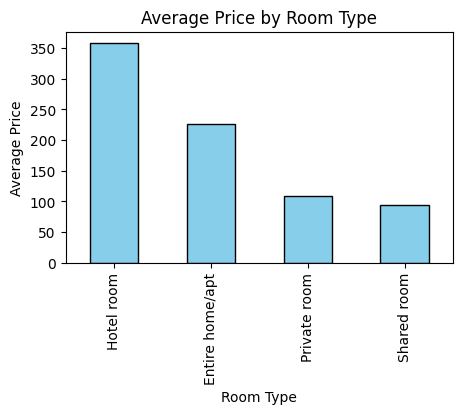

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
avg_room_type_price.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

# Availability

In [21]:
avg_price_always_available = df[ df['availability_365'] == 365]['price'].mean()

avg_price_not_always_available = df[ df['availability_365'] != 365]['price'].mean()

print("Average price when always available:", avg_price_always_available)
print("Average price when not always available:", avg_price_not_always_available)

Average price when always available: 189.40042735042735
Average price when not always available: 174.4109076492306


# Main Findings

The most expensive Air BnBs are hotels in Manhattan (the center of NYC) that are always available. Statistics such as the min required nights and number of reviews were not found to affect the price.